## Observations and Insights 

In [485]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
tumor_animal_study_raw = pd.merge(mouse_metadata,study_results,on='Mouse ID',how='outer')

# Display the data table for preview
tumor_animal_study_raw.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [486]:
# Checking the number of mice.
number_of_mice = mouse_metadata['Mouse ID'].count()
number_of_mice

249

In [487]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#Please see below
tumor_animal_study_raw.count()
tumor_animal_study_raw.to_csv("study.csv")

In [534]:
dup_rows = tumor_animal_study_raw.duplicated(subset=['Mouse ID','Timepoint'],keep=False)
dup_idices = tumor_animal_study_raw.index[dup_rows]
dup_idices

Int64Index([908, 909, 910, 911, 912, 913, 914, 915, 916, 917], dtype='int64')

In [535]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_rows = tumor_animal_study_raw[dup_rows]
dup_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [536]:
tumor_animal_study_raw.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [538]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dupl_mouse_id = dup_rows.at[dup_idices[0],'Mouse ID']
print(f' Duplicate mouse ID {dupl_mouse_id}')
tumor_animal_study = tumor_animal_study_raw.drop_duplicates(subset=['Mouse ID','Timepoint'],keep=False)
tumor_animal_study = tumor_animal_study.loc[tumor_animal_study['Mouse ID'] != dupl_mouse_id]
tumor_animal_study.count()

 Duplicate mouse ID g989


Mouse ID              1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

In [539]:
# Checking the number of mice in the clean DataFrame.
len(tumor_animal_study['Mouse ID'].unique())

248

## Summary Statistics

In [580]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
tumor_vol_mean = tumor_animal_study.groupby(['Drug Regimen']).mean()
tumor_median = tumor_animal_study.groupby(['Drug Regimen']).median()
tumor_std_dev = tumor_animal_study.groupby(['Drug Regimen']).std()
tumor_variance = tumor_animal_study.groupby(['Drug Regimen']).var()
tumor_sem = tumor_animal_study.groupby(['Drug Regimen']).sem()
tumor_study_stats = pd.DataFrame({'Mean': tumor_vol_mean['Tumor Volume (mm3)'],
                                 'Median':tumor_median['Tumor Volume (mm3)'],
                                 'Std Dev.':tumor_std_dev['Tumor Volume (mm3)'],
                                 'Variance':tumor_variance['Tumor Volume (mm3)'],
                                 'SEM':tumor_sem['Tumor Volume (mm3)']})
print(tumor_study_stats)

                   Mean     Median  Std Dev.   Variance       SEM
Drug Regimen                                                     
Capomulin     40.675741  41.557809  4.994774  24.947764  0.329346
Ceftamin      52.591172  51.776157  6.268188  39.290177  0.469821
Infubinol     52.884795  51.820584  6.567243  43.128684  0.492236
Ketapril      55.235638  53.698743  8.279709  68.553577  0.603860
Naftisol      54.331565  52.509285  8.134708  66.173479  0.596466
Placebo       54.033581  52.288934  7.821003  61.168083  0.581331
Propriva      52.320930  50.446266  6.622085  43.852013  0.544332
Ramicane      40.216745  40.673236  4.846308  23.486704  0.320955
Stelasyn      54.233149  52.431737  7.710419  59.450562  0.573111
Zoniferol     53.236507  51.818479  6.966589  48.533355  0.516398


In [581]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
tumor_study_stats_agg = tumor_animal_study.groupby(['Drug Regimen']).agg( {'Tumor Volume (mm3)'
                                                                           :['mean','median','std','var','sem']})
tumor_study_stats_agg

Tumor Volume (mm3)                                          
                           mean     median       std        var       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  4.994774  24.947764  0.329346
Ceftamin              52.591172  51.776157  6.268188  39.290177  0.469821
Infubinol             52.884795  51.820584  6.567243  43.128684  0.492236
Ketapril              55.235638  53.698743  8.279709  68.553577  0.603860
Naftisol              54.331565  52.509285  8.134708  66.173479  0.596466
Placebo               54.033581  52.288934  7.821003  61.168083  0.581331
Propriva              52.320930  50.446266  6.622085  43.852013  0.544332
Ramicane              40.216745  40.673236  4.846308  23.486704  0.320955
Stelasyn              54.233149  52.431737  7.710419  59.450562  0.573111
Zoniferol             53.236507  51.818479  6.966589  48.533355  0.516398

## Bar and Pie Charts

In [582]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using Pandas Plot.
unique_mice_count = tumor_animal_study['Drug Regimen'].value_counts()

Text(0,0.5,'Mice')

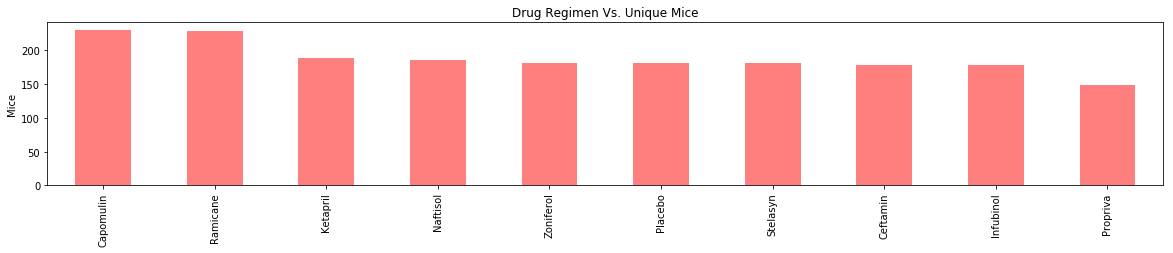

In [583]:
unique_mice_count.plot(kind='bar',facecolor='red',title='Drug Regimen Vs. Unique Mice',figsize=(20,3),alpha=0.5)
plt.ylabel("Mice")

([<matplotlib.axis.XTick at 0x7f8c8ac0ef28>,
 <a list of 10 Text xticklabel objects>)

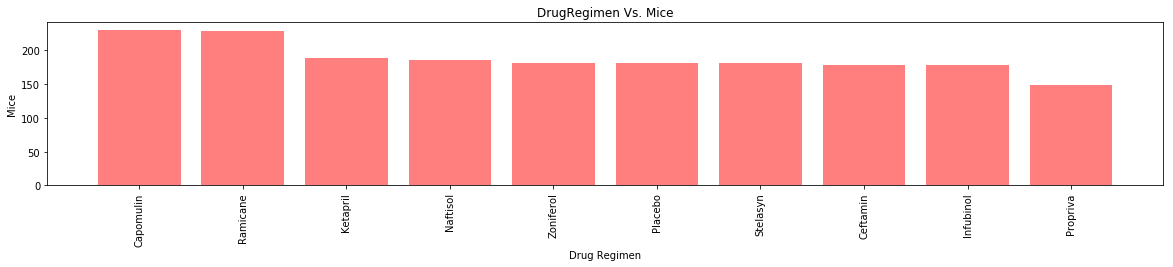

In [605]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using PyPlot.
unique_mice_count_plt = unique_mice_count.reset_index()
x_axis = np.arange(len(unique_mice_count_plt))
tick_locations = [x for x in x_axis]
plt.figure(figsize=(20,3))
plt.title("DrugRegimen Vs. Mice")
plt.ylabel("Mice")
plt.xlabel("Drug Regimen")
plt.bar(x_axis, unique_mice_count_plt['Drug Regimen'], color='r',alpha=0.5, align="center")
plt.xticks(tick_locations,unique_mice_count_plt['index'], rotation="vertical")

## Generate a pie plot showing the distribution of female versus male mice using pandas

(-1.1065502689644005,
 1.1003119175697333,
 -1.1041200173094385,
 1.1079114197007642)

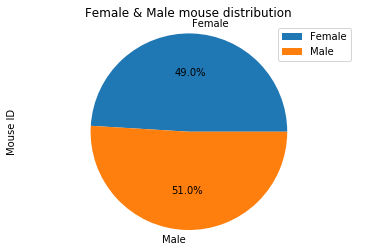

In [607]:
study_by_sex = tumor_animal_study.groupby('Sex') 
count_study_by_sex = study_by_sex.count() 
count_study_by_sex.plot(kind="pie", y='Mouse ID', title=("Female & Male mouse distribution"),autopct="%1.1f%%")
plt.axis("equal")

(-1.1065502689644005,
 1.1003119175697333,
 -1.1041200173094385,
 1.1079114197007642)

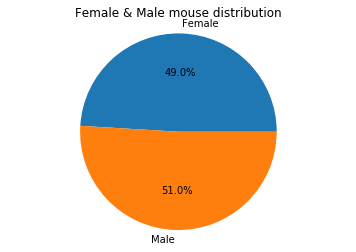

In [608]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_plt = count_study_by_sex.reset_index()
plt.pie(gender_plt['Mouse ID'],labels=gender_plt['Sex'],autopct="%1.1f%%")
plt.title("Female & Male mouse distribution")
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [587]:
#One way of finding the all roows with final tumor vol and having getting only the 4 regimens
#tumorvol = tumor_animal_study.loc[tumor_animal_study.groupby(['Mouse ID', 'Drug Regimen'])['Timepoint'].idxmax()]
#tumorvol = tumorvol.loc[tumorvol['Drug Regimen'].isin(['Capomulin','Ramicane','Infubinol','Ceftamin'])]
#tumorvol = tumorvol.reset_index(drop=True)

In [589]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Start by getting the last (greatest) timepoint for each mouse
# One way of getting rows with max timpepoint and only 4 regimen
tumorvol = tumor_animal_study.loc[tumor_animal_study.groupby(['Mouse ID', 'Drug Regimen'])['Timepoint'].idxmax()]
tumorvol_max_timepoint = tumorvol[['Mouse ID','Timepoint']]
tumorvol = tumorvol.loc[tumorvol['Drug Regimen'].isin(['Capomulin','Ramicane','Infubinol','Ceftamin'])]
tumorvol = tumorvol.reset_index(drop=True)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_tumor_animal_study = tumorvol_max_timepoint.merge(tumor_animal_study,on=['Mouse ID','Timepoint'],how='left')
merged_tumor_animal_study.head(10)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
5,a401,45,Zoniferol,Female,8,25,66.794156,4
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
8,a457,10,Ketapril,Female,11,30,49.783419,0
9,a492,45,Stelasyn,Male,20,25,60.122011,1


In [598]:
# Put treatments into a list for for loop (and later for plot labels)
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = tumorvol['Drug Regimen'].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data_list = []

for aTreatment in treatments:
    tumor_vol_data_by_drug = merged_tumor_animal_study.loc[merged_tumor_animal_study['Drug Regimen'] == aTreatment]
    tumor_vol_data = tumor_vol_data_by_drug['Tumor Volume (mm3)']
    quartiles = tumor_vol_data.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    # Determine outliers using upper and lower bounds
    outliers = tumor_vol_data_by_drug.loc[(tumor_vol_data_by_drug['Tumor Volume (mm3)'] < lower_bound) |
                                          (tumor_vol_data_by_drug['Tumor Volume (mm3)'] > upper_bound) ]
    #Append to the list
    tumor_vol_data_list.append(tumor_vol_data)
    
    print(f"Values below {lower_bound} and Values above {upper_bound} could be outliers for {aTreatment} regimen.")
    if len(outliers) > 0:
        tumor_vol = outliers['Tumor Volume (mm3)'].to_string() 
        mouse_id  = outliers['Mouse ID'].to_string()
        print(outliers.to_string())
        print()
        print(f"******Drug Regimen {aTreatment} has outliers*********" )
        print()

Values below 36.83290494999999 and Values above 82.74144559000001 could be outliers for Infubinol regimen.
   Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  Tumor Volume (mm3)  Metastatic Sites
31     c326          5    Infubinol  Female          18          25           36.321346                 0

******Drug Regimen Infubinol has outliers*********

Values below 25.355449580000002 and Values above 87.66645829999999 could be outliers for Ceftamin regimen.
Values below 17.912664470000003 and Values above 54.30681135 could be outliers for Ramicane regimen.
Values below 20.70456164999999 and Values above 51.83201549 could be outliers for Capomulin regimen.


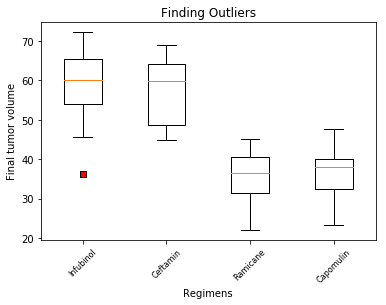

In [600]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
red_square = dict(markerfacecolor='r', marker='s')
fig1, ax1 = plt.subplots()
ax1.set_title('Finding Outliers')
ax1.set_xlabel('Regimens')
ax1.set_ylabel('Final tumor volume')
ax1.boxplot(tumor_vol_data_list,flierprops=red_square,whis=1.5)
plt.xticks([1, 2, 3, 4], treatments, rotation=45, fontsize=8)
plt.show()

## Line and Scatter Plots

Plotting for a mouse s185


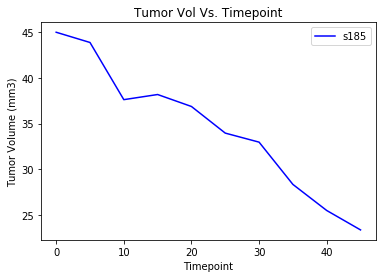

In [601]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_tumor_vol = tumor_animal_study.loc[tumor_animal_study['Drug Regimen'] == 'Capomulin']
mouse_idx = (Capomulin_tumor_vol.head()).index.values[0]
mouse_id = Capomulin_tumor_vol.at[mouse_idx,'Mouse ID']
print(f'Plotting for a mouse {mouse_id}')
Capomulin_tumor_vol_one = Capomulin_tumor_vol.loc[Capomulin_tumor_vol['Mouse ID'] == mouse_id]
plt.plot(Capomulin_tumor_vol_one['Timepoint'], Capomulin_tumor_vol_one['Tumor Volume (mm3)'],color="blue",label=mouse_id)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Vol Vs. Timepoint')
plt.legend()

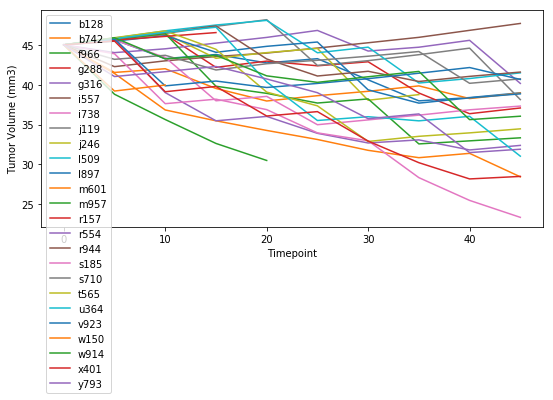

In [611]:
#Just an illustration that puts all the mice performance on this drug regimen Capomulin
fig, ax = plt.subplots(figsize=(9,4))
for key, grp in Capomulin_tumor_vol.groupby('Mouse ID'):
    ax.plot(grp['Timepoint'], grp['Tumor Volume (mm3)'], label=key)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
ax.legend(loc='upper left')
plt.show()

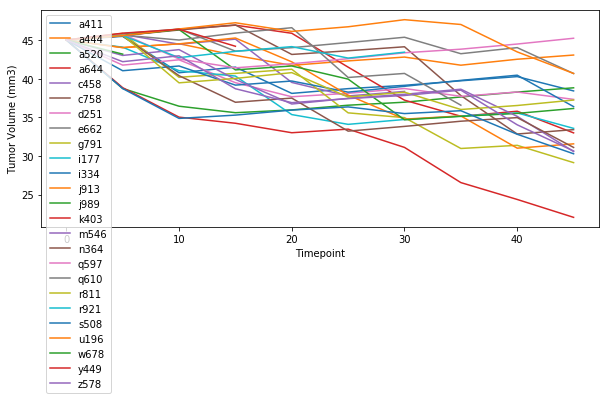

In [610]:
Ramicane_tumor_vol = tumor_animal_study.loc[tumor_animal_study['Drug Regimen'] == 'Ramicane']
fig1, ax1 = plt.subplots(figsize=(10,4))
for key, grp in Ramicane_tumor_vol.groupby('Mouse ID'):
    ax1.plot(grp['Timepoint'], grp['Tumor Volume (mm3)'], label=key)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
ax1.legend(loc='upper left')
plt.show()

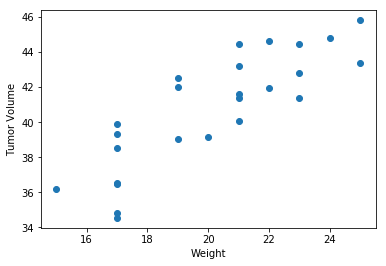

In [614]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_tumor_vol_mean = Capomulin_tumor_vol.groupby('Mouse ID').mean()
x_values = Capomulin_tumor_vol_mean['Weight (g)']
y_values = Capomulin_tumor_vol_mean['Tumor Volume (mm3)']
Capomulin_tumor_vol_mean.reset_index()
plt.scatter(x_values,y_values)
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.show()

## Correlation and Regression

The r-squared is: 0.7088568047708717
The correlation between weight and tumor vol. is 0.84


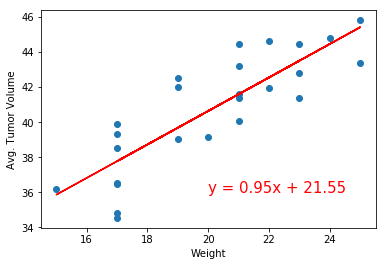

In [597]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values,y_values)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel('Weight')
plt.ylabel('Avg. Tumor Volume')
print(f"The r-squared is: {rvalue**2}")
print(f"The correlation between weight and tumor vol. is {round(correlation[0],2)}")
plt.show()